In [9]:
# Import the function to create synthetic classification datasets
from sklearn.datasets import make_classification

# Generate a synthetic dataset for classification
# X -> feature matrix (input variables)
# y -> target vector (class labels)

# Parameters explained:
# n_samples=1000        -> Total number of samples/data points to generate
# n_features=2          -> Each sample will have 2 features (columns)
# n_informative=2       -> Number of features that are actually informative for classification
# n_redundant=0         -> Number of features that are linear combinations of informative features (none here)
# n_repeated=0          -> Number of duplicate features (none here)
# n_clusters_per_class=1 -> Each class forms a single cluster in feature space
# weights=[0.90]        -> Class distribution; 90% samples in class 0, 10% in class 1 (imbalanced dataset)
# random_state=12       -> Ensures reproducibility; dataset will be the same every time this code is run
X, y = make_classification(
    n_samples=1000,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_repeated=0,
    n_clusters_per_class=1,
    weights=[0.90],
    random_state=12
)

# Now, X contains 1000 samples with 2 features each
# y contains the corresponding class labels (0 or 1) for each sample


In [12]:
# Import pandas library for data manipulation
import pandas as pd

# Create a DataFrame for the features
# X is the feature matrix (1000 samples, 2 features)
# columns=['f1', 'f2'] assigns names to the feature columns
df1 = pd.DataFrame(X, columns=['f1', 'f2'])

# Create a DataFrame for the target labels
# y is the target vector (1000 labels)
# columns=['target'] assigns a name to the target column
df2 = pd.DataFrame(y, columns=['target'])

# Concatenate the features and target DataFrames along columns (axis=1)
# Resulting df has 3 columns: f1, f2, target
final_df = pd.concat([df1, df2], axis=1)

# Now, final_df is a single DataFrame containing both features and target

In [13]:
final_df.head()

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


In [15]:
#number of 0s and 1s in target column
final_df['target'].value_counts()
#Clearly an imbalanced dataset

,count
target,
0,900
1,100


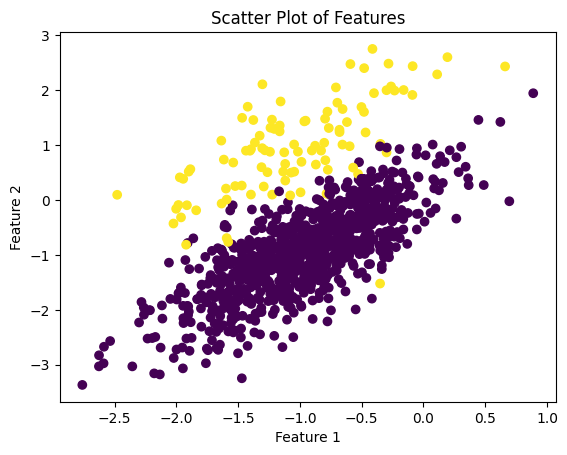

In [17]:
# Import matplotlib for plotting
import matplotlib.pyplot as plt

# Create a scatter plot of the two features
# final_df['f1'] -> x-axis values (Feature 1)
# final_df['f2'] -> y-axis values (Feature 2)
# c=final_df['target'] -> color points based on their class label (0 or 1)
plt.scatter(final_df['f1'], final_df['f2'], c=final_df['target'])

# Label for x-axis
plt.xlabel('Feature 1')

# Label for y-axis
plt.ylabel('Feature 2')

# Title of the plot
plt.title('Scatter Plot of Features')

# Display the plot
plt.show()


In [18]:
!pip install imblearn

In [19]:
from imblearn.over_sampling import SMOTE

In [21]:
# Import SMOTE from imblearn (ensure you have imbalanced-learn installed)
from imblearn.over_sampling import SMOTE

# Create a SMOTE object for oversampling the minority class
# SMOTE generates synthetic samples for the minority class to balance the dataset
oversample = SMOTE()

# Apply SMOTE to the dataset
# final_df[['f1', 'f2']] -> feature columns to be used for training
# final_df['target']      -> target labels
# fit_resample() returns the new features (X) and labels (y) after oversampling
X, y = oversample.fit_resample(final_df[['f1', 'f2']], final_df['target'])

# After this, X and y are balanced:
# - The minority class now has as many samples as the majority class
# - X contains features, y contains corresponding target labels


In [22]:
X.shape

(1800, 2)

In [23]:
y.shape

(1800,)

In [26]:
# Count the number of samples in class 0 after SMOTE
# y == 0 creates a boolean array where True indicates class 0
# y[y == 0] selects only those elements of y that are 0
# len(...) counts how many elements are in class 0
len(y[y == 0])

900

In [27]:
len(y[y == 1])
# Count the number of samples in class 1 after SMOTE

900

In [28]:
# Import pandas library for data manipulation
import pandas as pd

# Create a DataFrame for the features after SMOTE
# X is the feature matrix after oversampling (balanced dataset)
# columns=['f1', 'f2'] assigns names to the feature columns
df1 = pd.DataFrame(X, columns=['f1', 'f2'])

# Create a DataFrame for the target labels after SMOTE
# y is the target vector after oversampling
# columns=['target'] assigns a name to the target column
df2 = pd.DataFrame(y, columns=['target'])

# Concatenate the features and target DataFrames along columns (axis=1)
# Resulting oversample_df has 3 columns: f1, f2, target
oversample_df = pd.concat([df1, df2], axis=1)

# Now, oversample_df is a single DataFrame containing both features and target
# This DataFrame can be used for further analysis or visualization

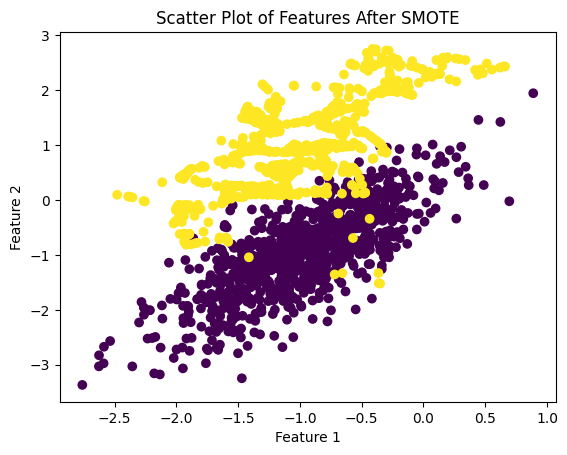

In [29]:
# Create a scatter plot of the oversampled (balanced) dataset
# oversample_df['f1'] -> x-axis values (Feature 1)
# oversample_df['f2'] -> y-axis values (Feature 2)
# c=oversample_df['target'] -> color points based on class label (0 or 1)
plt.scatter(oversample_df['f1'], oversample_df['f2'], c=oversample_df['target'])

# Optional: add labels and title for better readability
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot of Features After SMOTE')

# Display the plot
plt.show()
